In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [13]:
def convert_str_list_to_array(probs_list):
    prob_new_list = []
    for prob_str in probs_list:
        prob_str = prob_str[1:-1]
        prob_new_list.append(prob_str)
    prob_array = np.array(prob_new_list, dtype=np.float32)
    return prob_array



In [14]:
def get_cross_entropy_results(window_size, network, strategy, optimizer_name = 'RMSprop_mom_0.6_lr_1e-06'):
    from sklearn.metrics import roc_auc_score
    percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
    general_auc_knn = []
    general_auc_svm = []
    general_auc_rf = []
    general_auc_top = []
    general_auc_all = []
    general_std_knn = []
    general_std_svm = []
    general_std_rf = []
    general_std_top = []
    general_std_all = []
    for percentage in percentages:
        
        base_path = '/home/yesid08/ExperimentsV4/cross_entropy/{}/{}/{}/{}/{}/{}/results'.format(
            window_size,
            'BCE',
            optimizer_name,
            network,
            strategy,
            percentage
        )
        aucs_knn = []
        aucs_svm = []
        aucs_rf = []
        aucs_top = []
        aucs_all = []
        for fold in range(1,6):
            kfold_csv = pd.read_csv(base_path+'/kfold_results_{}.csv'.format(fold))
            kfold_csv = kfold_csv[kfold_csv['folds']== 'test']
            probs_list = kfold_csv['probs'].values.tolist()
            probs_array = convert_str_list_to_array(probs_list)
            aucs_top.append( roc_auc_score(kfold_csv['labels'], probs_array) )
        general_auc_top.append( np.mean(aucs_top) )
        general_std_top.append( np.std(aucs_top) )

    result = {
        'top': {
            'auc_std': general_std_top,
            'auc_mean': general_auc_top
        },

    }
    return result

In [15]:
def get_contrastive_results(window_size, contrastive_loss, network, strategy, optimizer_name = 'RMSprop_mom_0.6_lr_1e-06', mining='ep-shn'):
    from sklearn.metrics import roc_auc_score
    percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
    general_auc_knn = []
    general_auc_svm = []
    general_auc_rf = []
    general_auc_top = []
    general_auc_all = []
    general_std_knn = []
    general_std_svm = []
    general_std_rf = []
    general_std_top = []
    general_std_all = []
    for percentage in percentages:
        base_path = '/home/yesid08/ExperimentsV4/contrastive_learning/{}/{}/{}/{}/{}/{}/{}/results'.format(
            window_size,
            mining,
            contrastive_loss,
            optimizer_name,
            network,
            strategy,
            percentage
        )
        aucs_knn = []
        aucs_svm = []
        aucs_rf = []
        aucs_top = []
        aucs_all = []
        
        for fold in range(1,6):
            kfold_csv = pd.read_csv(base_path+'/kfold_results_{}.csv'.format(fold))
            kfold_csv = kfold_csv[kfold_csv['folds']== 'test']
            aucs_top.append( roc_auc_score(kfold_csv['labels'], kfold_csv['lr_probs']) )
        general_auc_top.append( np.mean(aucs_top) )
        general_std_top.append( np.std(aucs_top) )

    result = {
        'top': {
            'auc_std': general_std_top,
            'auc_mean': general_auc_top
        },

    }
    return result

# MertashMultiParametricNetworkV1512

In [16]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'MertashMultiParametricNetworkV1512'
contrastive_loss = 'NTXentLoss_T_0.07'

baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MertashMultiParametricNetworkV164', strategy)


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)



#color = 'red'
#plt.plot(baseline_4[classifier]['auc_mean'], 
#         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
#plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
#             yerr=baseline_4[classifier]['auc_std'],
#             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/cross_entropy/12_32_32/BCE/RMSprop_mom_0.6_lr_1e-06/MertashMultiParametricNetworkV164/reduce_negatives/1.0/results/kfold_results_1.csv'

In [17]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'MertashMultiParametricNetworkV1512'
contrastive_loss = 'NTXentLoss_T_0.07'

baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MertashMultiParametricNetworkV164', strategy)


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)



#color = 'red'
#plt.plot(baseline_4[classifier]['auc_mean'], 
#         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
#plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
#             yerr=baseline_4[classifier]['auc_std'],
#             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/cross_entropy/12_32_32/BCE/RMSprop_mom_0.6_lr_1e-06/MertashMultiParametricNetworkV164/reduce_positives/0.2/results/kfold_results_1.csv'

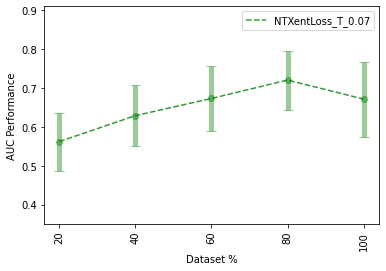

{'top': {'auc_std': [0.07468333891244494,
   0.07859759679673563,
   0.08311932520312124,
   0.07581270048979628,
   0.09673781289880622],
  'auc_mean': [0.56215,
   0.6288666666666668,
   0.6731666666666667,
   0.72045,
   0.6715333333333333]}}

In [14]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'MertashMultiParametricNetworkV1512'
contrastive_loss = 'NTXentLoss_T_0.07'

baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
#baseline_4 = get_cross_entropy_results(window_size, 'MertashMultiParametricNetworkV164', strategy, 'Adam_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)



#color = 'red'
#plt.plot(baseline_4[classifier]['auc_mean'], 
#         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
#plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
#             yerr=baseline_4[classifier]['auc_std'],
#             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

# MertashMultiParametricNetworkV2512

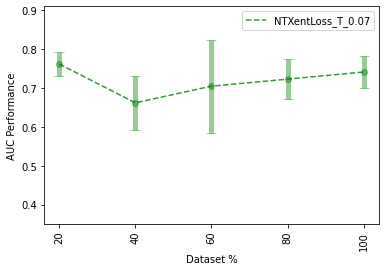

{'top': {'auc_std': [0.03049728585373533,
   0.06870794875574603,
   0.11975048596514706,
   0.05199183696611525,
   0.04101827505989114],
  'auc_mean': [0.7617666666666667,
   0.6618666666666667,
   0.7048166666666666,
   0.7229000000000001,
   0.7412833333333334]}}

In [10]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'MertashMultiParametricNetworkV2512'
contrastive_loss = 'NTXentLoss_T_0.07'

baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
#baseline_4 = get_cross_entropy_results(window_size, 'MertashMultiParametricNetworkV264', strategy, 'Adam_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)



#color = 'red'
#plt.plot(baseline_4[classifier]['auc_mean'], 
#         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
#plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
#             yerr=baseline_4[classifier]['auc_std'],
#             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

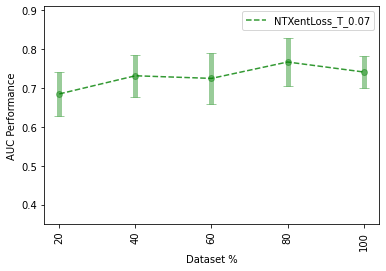

{'top': {'auc_std': [0.0559591219850109,
   0.05371473003024608,
   0.06567131117246797,
   0.06102495846418544,
   0.04101827505989114],
  'auc_mean': [0.68485,
   0.7315833333333333,
   0.7247833333333332,
   0.7670166666666667,
   0.7412833333333334]}}

In [20]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'MertashMultiParametricNetworkV2512'
contrastive_loss = 'NTXentLoss_T_0.07'

baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
#baseline_4 = get_cross_entropy_results(window_size, 'MertashMultiParametricNetworkV264', strategy, 'Adam_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)



#color = 'red'
#plt.plot(baseline_4[classifier]['auc_mean'], 
#         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
#plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
#             yerr=baseline_4[classifier]['auc_std'],
#             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

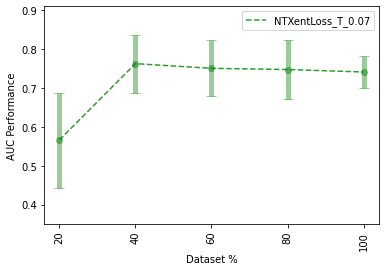

{'top': {'auc_std': [0.1222956163473482,
   0.07474288520580999,
   0.0725441245036426,
   0.07579212066933842,
   0.04101827505989114],
  'auc_mean': [0.5660999999999999,
   0.7627833333333334,
   0.75075,
   0.7476833333333334,
   0.7412833333333334]}}

In [18]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'MertashMultiParametricNetworkV2512'
contrastive_loss = 'NTXentLoss_T_0.07'

baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
#baseline_4 = get_cross_entropy_results(window_size, 'MertashMultiParametricNetworkV264', strategy, 'Adam_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)



#color = 'red'
#plt.plot(baseline_4[classifier]['auc_mean'], 
#         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
#plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
#             yerr=baseline_4[classifier]['auc_std'],
#             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

# MertashBiParametricNetworkV2

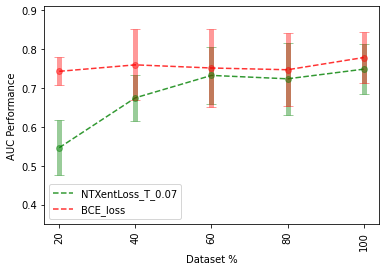

{'top': {'auc_std': [0.07086551425842554,
   0.0593102951527904,
   0.07334515813755006,
   0.0929493051794005,
   0.06450526248988445],
  'auc_mean': [0.54645,
   0.6748333333333334,
   0.7325166666666667,
   0.7237333333333333,
   0.7485666666666667]}}

In [18]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'MertashBiParametricNetworkV2512'
contrastive_loss = 'NTXentLoss_T_0.07'

baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MertashBiParametricNetworkV264', strategy)


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)



color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

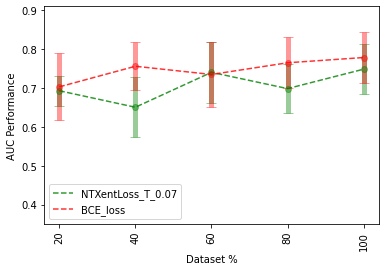

{'top': {'auc_std': [0.03833479707350315,
   0.07745407241283918,
   0.07800994238628248,
   0.06298783833231443,
   0.06450526248988445],
  'auc_mean': [0.6929833333333334,
   0.6505000000000001,
   0.7404333333333333,
   0.6985166666666666,
   0.7485666666666667]}}

In [19]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'MertashBiParametricNetworkV2512'
contrastive_loss = 'NTXentLoss_T_0.07'

baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MertashBiParametricNetworkV264', strategy)


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)



color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

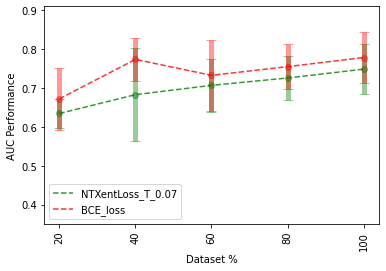

{'top': {'auc_std': [0.037069544252810935,
   0.12015686506489018,
   0.06743454439512277,
   0.057575303347490545,
   0.06450526248988445],
  'auc_mean': [0.6344,
   0.6829166666666667,
   0.7069000000000001,
   0.7258666666666667,
   0.7485666666666667]}}

In [20]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'MertashBiParametricNetworkV2512'
contrastive_loss = 'NTXentLoss_T_0.07'

baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MertashBiParametricNetworkV264', strategy)


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)



color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

# Mertash et al

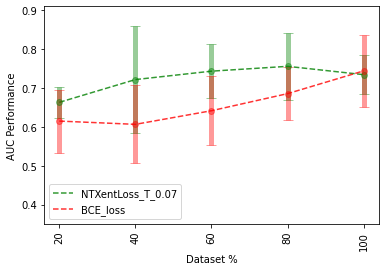

{'top': {'auc_std': [0.03930508872906914,
   0.1385892251704054,
   0.06904028614592436,
   0.08702530921774679,
   0.049613125503461517],
  'auc_mean': [0.66315,
   0.7217666666666667,
   0.7434166666666666,
   0.7558666666666667,
   0.7344333333333333]}}

In [22]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'mertash512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'mertash64', strategy, 'Adam_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)

color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

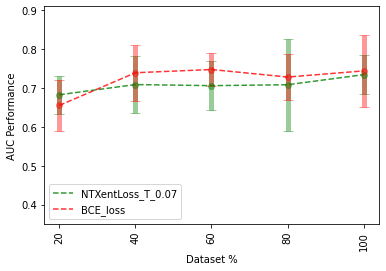

{'top': {'auc_std': [0.04927024118742132,
   0.07317486666274912,
   0.0637372732394476,
   0.11788925594245925,
   0.049613125503461517],
  'auc_mean': [0.6826833333333333,
   0.7089166666666665,
   0.7061,
   0.70845,
   0.7344333333333333]}}

In [23]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'mertash512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'mertash64', strategy, 'Adam_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)

color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

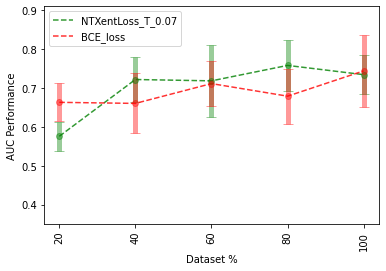

{'top': {'auc_std': [0.03713931729163701,
   0.05825171432861198,
   0.09257934134808066,
   0.06582273332384657,
   0.049613125503461517],
  'auc_mean': [0.5757666666666666,
   0.7219333333333333,
   0.7184833333333333,
   0.7582166666666668,
   0.7344333333333333]}}

In [24]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'mertash512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'mertash64', strategy, 'Adam_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)



color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

In [37]:
baseline_4

{'top': {'auc_std': [0.04885216929108109,
   0.07748296586992522,
   0.05696221944802051,
   0.0711936638878614,
   0.09207731654551095],
  'auc_mean': [0.6631500000000001,
   0.6603833333333332,
   0.7114166666666668,
   0.6790333333333333,
   0.7441166666666666]}}

# ALEXANET


In [25]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'alexanet512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'alexanet64', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/alexanet512/reduce_positives/0.2/results/kfold_results_1.csv'

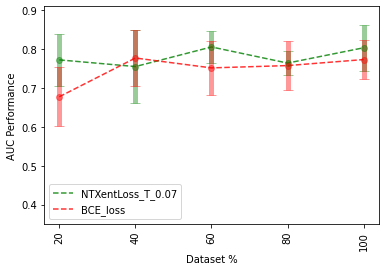

{'top': {'auc_std': [0.06652638574280134,
   0.0947586642183418,
   0.04028433663072756,
   0.029821412888504577,
   0.059621770818683],
  'auc_mean': [0.7724666666666666,
   0.7553000000000001,
   0.8057500000000001,
   0.7642499999999999,
   0.8036666666666665]}}

In [39]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'alexanet512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'alexanet64', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

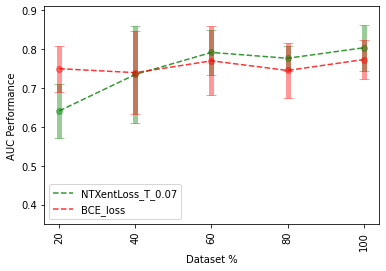

{'top': {'auc_std': [0.06892431436808862,
   0.12464260462975287,
   0.05876772545841429,
   0.032163540435302444,
   0.059621770818683],
  'auc_mean': [0.6412500000000001,
   0.7349833333333333,
   0.7916833333333333,
   0.7766333333333334,
   0.8036666666666665]}}

In [40]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'alexanet512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'alexanet64', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

# Mertash-Lenet inspired V1

In [26]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'MertashLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MertashLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/MertashLenetInspiredV1512/stratified/0.4/results/kfold_results_4.csv'

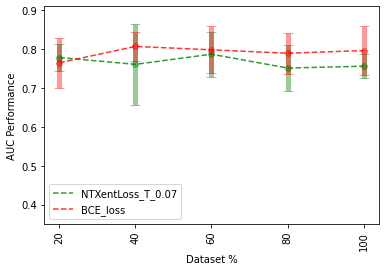

{'top': {'auc_std': [0.034748876880331576,
   0.10472569460791895,
   0.057811340679066736,
   0.05921580119453849,
   0.03045324284866885],
  'auc_mean': [0.7786000000000001,
   0.7609666666666667,
   0.7870666666666667,
   0.7515000000000001,
   0.7561666666666668]}}

In [27]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'MertashLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MertashLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

In [28]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'MertashLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MertashLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/MertashLenetInspiredV1512/reduce_positives/1.0/results/kfold_results_5.csv'

 # BiparametricLenetInspiredV1

In [29]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'BiparametricLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'BiparametricLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/BiparametricLenetInspiredV1512/stratified/0.2/results/kfold_results_1.csv'

In [30]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'BiparametricLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'BiparametricLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/BiparametricLenetInspiredV1512/reduce_negatives/0.2/results/kfold_results_1.csv'

In [31]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'BiparametricLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'BiparametricLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/BiparametricLenetInspiredV1512/reduce_positives/0.2/results/kfold_results_1.csv'

# BiparametricLenetInspiredV2

In [32]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'BiparametricLenetInspiredV2512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'BiparametricLenetInspiredV264', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/BiparametricLenetInspiredV2512/reduce_negatives/0.2/results/kfold_results_1.csv'

In [33]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'BiparametricLenetInspiredV2512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'BiparametricLenetInspiredV264', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/BiparametricLenetInspiredV2512/reduce_positives/0.2/results/kfold_results_1.csv'

In [34]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'BiparametricLenetInspiredV2512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'BiparametricLenetInspiredV264', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/BiparametricLenetInspiredV2512/stratified/0.2/results/kfold_results_1.csv'

# MultiparametricLenetInspiredV1

In [35]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'MultiparametricLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MultiparametricLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/MultiparametricLenetInspiredV1512/stratified/0.2/results/kfold_results_1.csv'

In [36]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'MultiparametricLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MultiparametricLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/MultiparametricLenetInspiredV1512/reduce_negatives/0.2/results/kfold_results_1.csv'

In [37]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'MultiparametricLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MultiparametricLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_4

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/MultiparametricLenetInspiredV1512/reduce_positives/0.2/results/kfold_results_1.csv'

# MultiparametricLenetInspiredV2

In [38]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'MultiparametricLenetInspiredV2512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MultiparametricLenetInspiredV264', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/MultiparametricLenetInspiredV2512/stratified/0.2/results/kfold_results_1.csv'

In [39]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'MultiparametricLenetInspiredV2512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MultiparametricLenetInspiredV264', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/MultiparametricLenetInspiredV2512/reduce_negatives/0.2/results/kfold_results_1.csv'

In [40]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'MultiparametricLenetInspiredV2512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MultiparametricLenetInspiredV264', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/yesid08/ExperimentsV4/contrastive_learning/12_32_32/ep-shn/NTXentLoss_T_0.07/RMSprop_mom_0.6_lr_1e-06/MultiparametricLenetInspiredV2512/reduce_positives/0.2/results/kfold_results_1.csv'